# Curve fitting births and deaths

In [158]:
import pandas as pd

In [159]:
df = pd.read_csv('./1710000801-eng.csv')
df = df.transpose()

In [160]:
df = df.set_axis(df.iloc[0], axis=1)
df = df[1:]

In [161]:
df.head()

Components of population growth,NaN,Births,Deaths,Immigrants,Net emigration,Emigrants,Returning emigrants,Net temporary emigration,Net non-permanent residents,"Non-permanent residents, inflows",...,12,13,14,15,16,17,18,19,"How to cite: Statistics Canada. Table 17-10-0008-01 Estimates of the components of demographic growth, annual",https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000801
1971 / 1972,Persons,"351,256","159,533","117,036","26,577","66,034","39,457",..,"2,997",..,...,The net temporary emigrants is final up to 201...,A non-permanent resident refers to a person fr...,The net non-permanent residents is final up to...,This is an estimate of the number of non-perma...,"The number of people entering Canada to work, ...",The number of work and study permit holders le...,The net interprovincial migration is final up ...,Residual deviation is obtained by linearly dis...,NaN,NaN
1972 / 1973,NaN,"345,815","162,618","138,526","27,733","63,850","36,117",..,"7,994",..,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973 / 1974,NaN,"342,446","166,284","217,456","46,754","83,501","36,747",..,"-2,001",..,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974 / 1975,NaN,"355,960","168,751","209,283","40,502","78,021","37,519",..,"7,989",..,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975 / 1976,NaN,"364,278","166,428","170,028","30,315","66,714","36,399",..,"-2,998",..,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
df = df[['Births', 'Deaths', 'Immigrants', 'Net emigration', 'Emigrants', 'Returning emigrants', 'Net non-permanent residents']]
# df = df.apply(pd.to_numeric, errors='coerce')

In [163]:
df.Deaths = df.Deaths.str.replace(',', '').astype(int)
df.Births = df.Births.str.replace(',', '').astype(int)

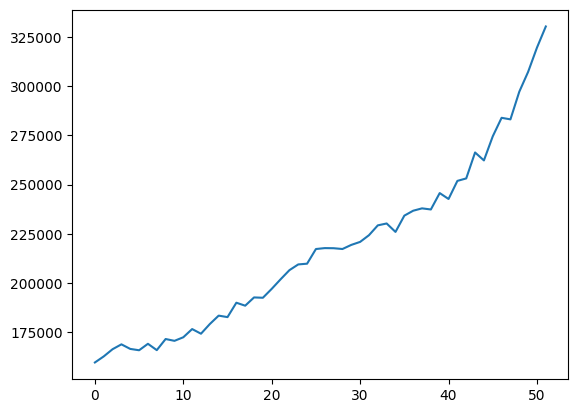

In [164]:
deaths = np.array(df.Deaths)
plt.plot(deaths)

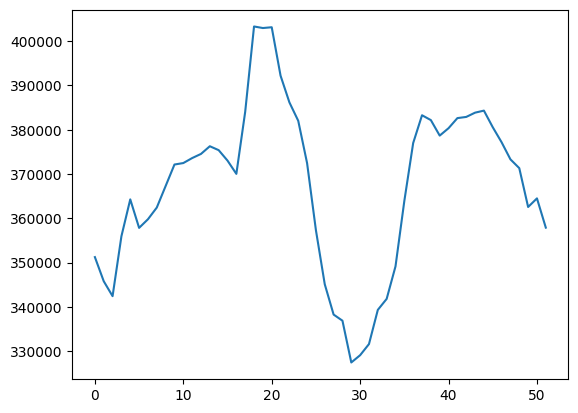

In [165]:
births = np.array(df.Births)
plt.plot(births)

In [166]:
deaths

array([159533, 162618, 166284, 168751, 166428, 165747, 169030, 165805,
       171460, 170535, 172352, 176522, 174159, 179085, 183353, 182599,
       189917, 188408, 192608, 192439, 196967, 201808, 206464, 209389,
       209766, 217221, 217688, 217632, 217229, 219320, 220847, 224254,
       229256, 230211, 225915, 234193, 236696, 237896, 237330, 245667,
       242669, 251865, 253122, 266313, 262278, 274517, 283939, 283148,
       297195, 307297, 319619, 330379])

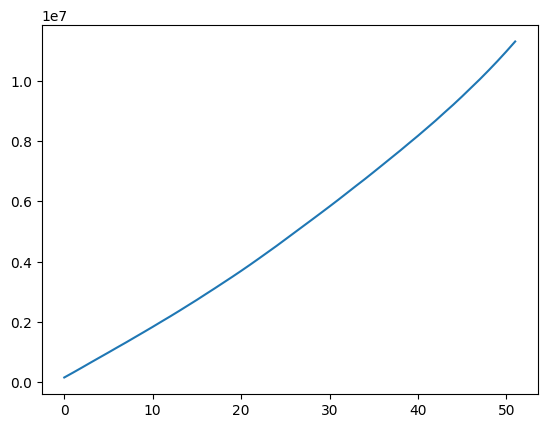

In [167]:
plt.plot(np.cumsum(deaths))

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 3958602577.01795
        x: [ 1.516e+05  1.358e-02]
      nit: 65
      jac: [ 4.763e+01 -3.347e+08]
     nfev: 276
     njev: 92
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

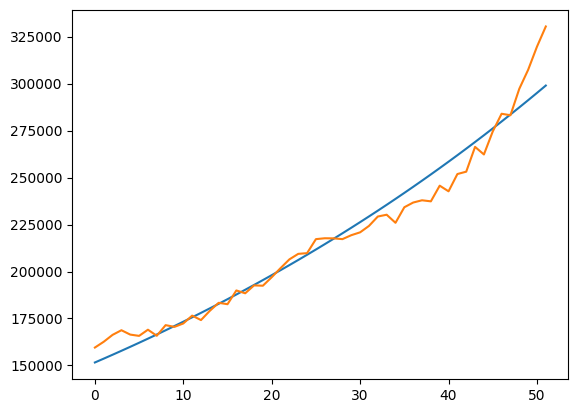

In [174]:
# K / (1 + (K/a - 1)  e ^ (-rt))
ts = np.arange(0, len(deaths))
K = sum(deaths)
y = lambda t, p: K / (1 + (K/p[0] - 1) * np.exp(-p[1] * t))
f = lambda p: np.sum((y(ts, p) - deaths) ** 2)
p0 = [1, 1]
res = minimize(f, p0, bounds=[(0, None), (0, None)])
plt.plot(ts, y(ts, res.x))
plt.plot(ts, deaths)
res

In [ ]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.arange(len(deaths))
ydata = deaths

popt, pcov = curve_fit(func, xdata, ydata)
popt

/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_3014/1989695758.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c  # This is just an example. Replace it with your actual function.


array([ 2.70402046e+04, -3.68711803e-02,  1.37081906e+05])

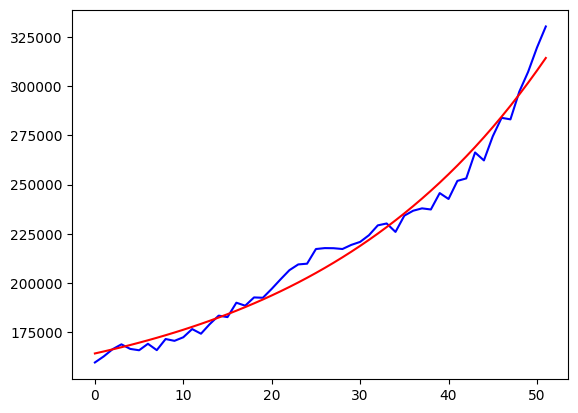

In [ ]:
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')

In [ ]:
def func(x, a, b, c):
    return np.sin(2*np.pi*x/27 - a ) * b +c

xdata = np.arange(len(births))
ydata = births

popt, pcov = curve_fit(func, xdata, ydata)
popt

array([ 1.16355001e+01, -2.18451124e+04,  3.66911137e+05])

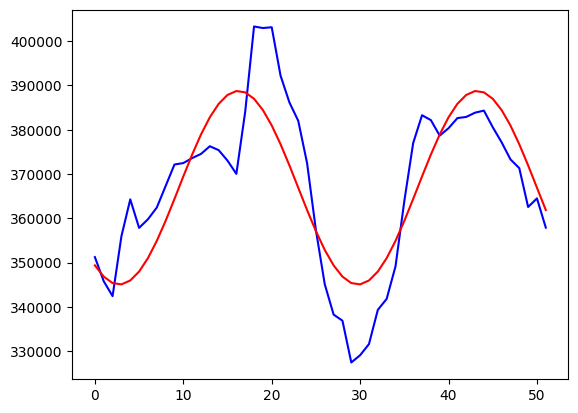

In [ ]:
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')

In [179]:
K = sum(deaths)
def func(x, a, r):
    return K / (1 + (K/a - 1) * np.exp(-r * x))

xdata = np.arange(len(deaths))
ydata = deaths

popt, pcov = curve_fit(func, xdata, ydata)
popt

array([1.51593775e+05, 1.35756632e-02])

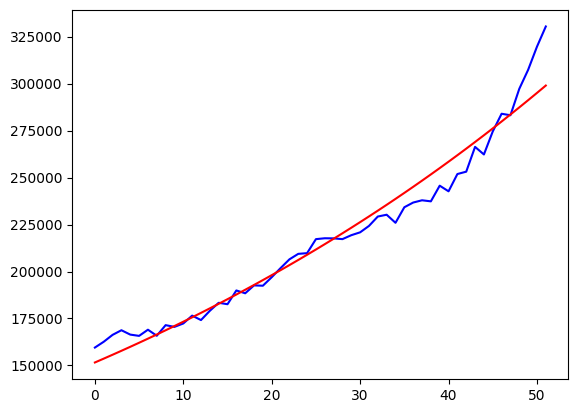

In [180]:
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')

In [181]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize._minpack_py:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=None, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, nan_policy=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``.
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...). It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for
        functions with k predictors, and each element should be float
        convertible if it is an array like object.
    ydata : array_like
        The dependent data, a length M array - nominally ``f(xdata, ...)``.
    p0 : array_like, optional